In [15]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import pandas as pd

In [2]:
p = r'C:\Users\Donald\PycharmProjects\monkey_nuc_segment\Segmentation_Analysis\monkey\thesis\pan_qual_dfs.pkl'

with open(p, 'rb') as f:
    dfs_t = pickle.load(f)

In [94]:
def get_f1(tp, fp, fn):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    avg_precision = tp / (tp + fp + fn)
    f1 = 2 * precision * recall / (precision + recall)
    return precision, recall, avg_precision, f1

def find_first_unique_indices(lst):
    unique_indices = {}
    result = []

    for i, value in enumerate(lst):
        if value not in unique_indices:
            unique_indices[value] = i

    for value in lst:
        result.append(unique_indices[value])

    return result

def get_organ_f1(result):
    names = result['Image']

    names = [name.split(".")[0][21:] for name in names]

    for i in range(len(names)):
        #if len(names[i]) > 6:
        names[i] = names[i][:2]

    result_list = find_first_unique_indices(names)

    f1_scores = result['F1 Score']

    seen = []
    names = []

    raw_vals = result[['Image', 'TP', 'FP', 'FN', 'Avg Precision','pq_num', 'pth_model']]

    TPs = [0 for _ in range(len(raw_vals))]
    FPs = [0 for _ in range(len(raw_vals))]
    FNs = [0 for _ in range(len(raw_vals))]
    APs = [0 for _ in range(len(raw_vals))]
    PQ_nums = [0 for _ in range(len(raw_vals))]
    nm_models = [0 for _ in range(len(raw_vals))]

    for i in range(len(raw_vals)):
        row = raw_vals.iloc[i]
        num = result_list[i]
        if num not in seen:
            names.append(raw_vals['Image'][i])
            seen.append(num)

        TPs[num] += row['TP']
        FPs[num] += row['FP']
        FNs[num] += row['FN']
        APs[num] += row['Avg Precision']
        PQ_nums[num] += row['pq_num']
        nm_models[num] = row['pth_model']

    organ_names = []
    for i in range(len(names)):
        nm = names[i][21:-4]
        if nm[-1] == '1':
            nm = nm[:-1]
        organ_names.append(nm)

    TPs = [val for val in TPs if val != 0]
    FPs = [val for val in FPs if val != 0]
    FNs = [val for val in FNs if val != 0]
    APs = [val for val in APs if val != 0]
    PQ_nums = [val for val in PQ_nums if val != 0]
    names = [val for val in nm_models if val != 0]

    if [len(organ_names), len(TPs), len(FPs), len(FNs)] != [len(organ_names), len(organ_names), len(organ_names), len(organ_names)]:
        print('skipped')
        return 0

    new_df = pd.DataFrame({'Organ': organ_names, 'TP': TPs, 'FP': FPs, 'FN': FNs, 'AP': APs})

    precisions = []
    recalls = []
    f1s = []
    APs = []

    for i in range(len(new_df)):
        row = new_df.iloc[i]

        tp = row['TP']
        fp = row['FP']
        fn = row['FN']

        precision, recall, avg_precision, f1 = get_f1(tp, fp, fn)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
        APs.append(avg_precision)

    new_df['Recall'] = recalls
    new_df['Precision'] = precisions
    new_df['F1'] = f1s
    new_df['AP'] = APs
    new_df['PQ_nums'] = PQ_nums
    new_df['pth_model'] = names

    return new_df

In [95]:
dfs_t[0]

,Image,Tau,IoU,TP,FP,FN,Precision,Recall,Avg Precision,F1 Score,Seg Quality,Pan Quality,pq_num,pth_model
0,monkey_fetus_40_0272_eyes1.tif,0.7,0.739823,153,28,45,0.845304,0.772727,0.676991,0.807388,0.846171,0.683188,129.464200,monkey_12_12_2023_lr_0.005_epochs_400_pt_40_ga...
1,monkey_fetus_40_0273_bone.tif,0.7,0.729419,32,5,24,0.864865,0.571429,0.524590,0.688172,0.842054,0.579478,26.945714,monkey_12_12_2023_lr_0.005_epochs_400_pt_40_ga...
2,monkey_fetus_40_0281_eyes2.tif,0.7,0.682934,130,50,111,0.722222,0.539419,0.446735,0.617577,0.813083,0.502141,105.700744,monkey_12_12_2023_lr_0.005_epochs_400_pt_40_ga...
3,monkey_fetus_40_0308_liver1.tif,0.7,0.807160,135,13,20,0.912162,0.870968,0.803571,0.891089,0.863118,0.769115,116.520888,monkey_12_12_2023_lr_0.005_epochs_400_pt_40_ga...
4,monkey_fetus_40_0323_ears1.tif,0.7,0.670261,110,108,122,0.504587,0.474138,0.323529,0.488889,0.792253,0.387324,87.147882,monkey_12_12_2023_lr_0.005_epochs_400_pt_40_ga...
5,monkey_fetus_40_0344_brain1.tif,0.7,0.763148,196,40,87,0.830508,0.692580,0.606811,0.755299,0.845470,0.638583,165.712190,monkey_12_12_2023_lr_0.005_epochs_400_pt_40_ga...
6,monkey_fetus_40_0380_heart1.tif,0.7,0.758650,71,12,20,0.855422,0.780220,0.689320,0.816092,0.825936,0.674039,58.641430,monkey_12_12_2023_lr_0.005_epochs_400_pt_40_ga...
7,monkey_fetus_40_0381_thymus.tif,0.7,0.810057,134,11,35,0.924138,0.792899,0.744444,0.853503,0.852820,0.727884,114.277853,monkey_12_12_2023_lr_0.005_epochs_400_pt_40_ga...
8,monkey_fetus_40_0426_lungs.tif,0.7,0.692953,114,64,147,0.640449,0.436782,0.350769,0.519362,0.805344,0.418265,91.809198,monkey_12_12_2023_lr_0.005_epochs_400_pt_40_ga...
9,monkey_fetus_40_0428_thyroid1.tif,0.7,0.748314,98,13,24,0.882883,0.803279,0.725926,0.841202,0.844184,0.710129,82.730081,monkey_12_12_2023_lr_0.005_epochs_400_pt_40_ga...


In [99]:
for df in dfs_t:
    pq_nums_list = []
    for index, row in df.iterrows():
        pq = row['Pan Quality']
        denom = row['TP']+1/2*row['FP']+1/2*row['FN']
        pq_nums_list.append(pq*denom)
    df['pq_num'] = pq_nums_list
    #print(len(pq_nums_list))

In [100]:
dfs_t[0]

,Image,Tau,IoU,TP,FP,FN,Precision,Recall,Avg Precision,F1 Score,Seg Quality,Pan Quality,pq_num,pth_model
0,monkey_fetus_40_0272_eyes1.tif,0.7,0.739823,153,28,45,0.845304,0.772727,0.676991,0.807388,0.846171,0.683188,129.464200,monkey_12_12_2023_lr_0.005_epochs_400_pt_40_ga...
1,monkey_fetus_40_0273_bone.tif,0.7,0.729419,32,5,24,0.864865,0.571429,0.524590,0.688172,0.842054,0.579478,26.945714,monkey_12_12_2023_lr_0.005_epochs_400_pt_40_ga...
2,monkey_fetus_40_0281_eyes2.tif,0.7,0.682934,130,50,111,0.722222,0.539419,0.446735,0.617577,0.813083,0.502141,105.700744,monkey_12_12_2023_lr_0.005_epochs_400_pt_40_ga...
3,monkey_fetus_40_0308_liver1.tif,0.7,0.807160,135,13,20,0.912162,0.870968,0.803571,0.891089,0.863118,0.769115,116.520888,monkey_12_12_2023_lr_0.005_epochs_400_pt_40_ga...
4,monkey_fetus_40_0323_ears1.tif,0.7,0.670261,110,108,122,0.504587,0.474138,0.323529,0.488889,0.792253,0.387324,87.147882,monkey_12_12_2023_lr_0.005_epochs_400_pt_40_ga...
5,monkey_fetus_40_0344_brain1.tif,0.7,0.763148,196,40,87,0.830508,0.692580,0.606811,0.755299,0.845470,0.638583,165.712190,monkey_12_12_2023_lr_0.005_epochs_400_pt_40_ga...
6,monkey_fetus_40_0380_heart1.tif,0.7,0.758650,71,12,20,0.855422,0.780220,0.689320,0.816092,0.825936,0.674039,58.641430,monkey_12_12_2023_lr_0.005_epochs_400_pt_40_ga...
7,monkey_fetus_40_0381_thymus.tif,0.7,0.810057,134,11,35,0.924138,0.792899,0.744444,0.853503,0.852820,0.727884,114.277853,monkey_12_12_2023_lr_0.005_epochs_400_pt_40_ga...
8,monkey_fetus_40_0426_lungs.tif,0.7,0.692953,114,64,147,0.640449,0.436782,0.350769,0.519362,0.805344,0.418265,91.809198,monkey_12_12_2023_lr_0.005_epochs_400_pt_40_ga...
9,monkey_fetus_40_0428_thyroid1.tif,0.7,0.748314,98,13,24,0.882883,0.803279,0.725926,0.841202,0.844184,0.710129,82.730081,monkey_12_12_2023_lr_0.005_epochs_400_pt_40_ga...


In [101]:
model_pths = r'\\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models'
pths = os.listdir(model_pths)
pths = ["".join([model_pths, '\\', pth]) for pth in pths if 'monkey' in pth]

In [110]:
for i, df in enumerate(dfs_t):
    df['pth_model'] = os.path.basename(pths[i])

In [111]:
dfs_t[10]

,Image,Tau,IoU,TP,FP,FN,Precision,Recall,Avg Precision,F1 Score,Seg Quality,Pan Quality,pq_num,pth_model
0,monkey_fetus_40_0272_eyes1.tif,0.7,0.735249,151,29,47,0.838889,0.762626,0.665198,0.798942,0.844836,0.674975,127.570287,monkey_12_12_2023_lr_0.0005_epochs_200_pt_20_g...
1,monkey_fetus_40_0273_bone.tif,0.7,0.717400,30,9,26,0.769231,0.535714,0.461538,0.631579,0.843180,0.532535,25.295405,monkey_12_12_2023_lr_0.0005_epochs_200_pt_20_g...
2,monkey_fetus_40_0281_eyes2.tif,0.7,0.652658,125,43,116,0.744048,0.518672,0.440141,0.611247,0.817460,0.499670,102.182528,monkey_12_12_2023_lr_0.0005_epochs_200_pt_20_g...
3,monkey_fetus_40_0308_liver1.tif,0.7,0.825988,135,13,20,0.912162,0.870968,0.803571,0.891089,0.860162,0.766481,116.121901,monkey_12_12_2023_lr_0.0005_epochs_200_pt_20_g...
4,monkey_fetus_40_0323_ears1.tif,0.7,0.662554,107,113,125,0.486364,0.461207,0.310145,0.473451,0.792852,0.375377,84.835130,monkey_12_12_2023_lr_0.0005_epochs_200_pt_20_g...
5,monkey_fetus_40_0344_brain1.tif,0.7,0.766188,205,38,78,0.843621,0.724382,0.638629,0.779468,0.836954,0.652379,171.575606,monkey_12_12_2023_lr_0.0005_epochs_200_pt_20_g...
6,monkey_fetus_40_0380_heart1.tif,0.7,0.715520,64,12,27,0.842105,0.703297,0.621359,0.766467,0.824211,0.631730,52.749477,monkey_12_12_2023_lr_0.0005_epochs_200_pt_20_g...
7,monkey_fetus_40_0381_thymus.tif,0.7,0.794496,129,16,40,0.889655,0.763314,0.697297,0.821656,0.854178,0.701841,110.188981,monkey_12_12_2023_lr_0.0005_epochs_200_pt_20_g...
8,monkey_fetus_40_0426_lungs.tif,0.7,0.669217,105,63,156,0.625000,0.402299,0.324074,0.489510,0.809471,0.396244,84.994426,monkey_12_12_2023_lr_0.0005_epochs_200_pt_20_g...
9,monkey_fetus_40_0428_thyroid1.tif,0.7,0.728524,95,12,27,0.887850,0.778689,0.708955,0.829694,0.848165,0.703718,80.575681,monkey_12_12_2023_lr_0.0005_epochs_200_pt_20_g...


In [112]:
dfs_w_pq_num = []

for df in dfs_t:
    df2 = get_organ_f1(df)
    dfs_w_pq_num.append(df2)

skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped


In [113]:
dfs_w_pq_num[1]

,Organ,TP,FP,FN,AP,Recall,Precision,F1,PQ_nums,pth_model
0,eyes,284,73,155,0.554688,0.646925,0.795518,0.713568,234.505497,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...
1,bone,99,26,67,0.515625,0.596386,0.792000,0.680412,82.092355,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...
2,liver,240,77,132,0.534521,0.645161,0.757098,0.696662,201.291834,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...
3,ears,176,157,204,0.327747,0.463158,0.528529,0.493689,141.245030,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...
4,brain,702,262,419,0.507592,0.626227,0.728216,0.673381,579.614591,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...
5,heart,173,64,105,0.505848,0.622302,0.729958,0.671845,140.422264,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...
6,thymus,532,119,211,0.617169,0.716016,0.817204,0.763271,446.047920,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...
7,lungs,195,111,223,0.368620,0.466507,0.637255,0.538674,155.826928,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...
8,gi,451,323,613,0.325162,0.423872,0.582687,0.490751,366.553175,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...
9,kidney,205,189,315,0.289140,0.394231,0.520305,0.448578,165.061743,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...


In [114]:
for df in dfs_t:
    print(df.iloc[0]['pth_model'])

monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_gaus_ratio_0
monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_gaus_ratio_0.1
monkey_12_12_2023_lr_0.0005_epochs_100_pt_20_gaus_ratio_0
monkey_12_12_2023_lr_0.0005_epochs_100_pt_20_gaus_ratio_0.1
monkey_12_12_2023_lr_0.0005_epochs_100_pt_30_gaus_ratio_0
monkey_12_12_2023_lr_0.0005_epochs_100_pt_30_gaus_ratio_0.1
monkey_12_12_2023_lr_0.0005_epochs_100_pt_40_gaus_ratio_0
monkey_12_12_2023_lr_0.0005_epochs_100_pt_40_gaus_ratio_0.1
monkey_12_12_2023_lr_0.0005_epochs_200_pt_10_gaus_ratio_0
monkey_12_12_2023_lr_0.0005_epochs_200_pt_10_gaus_ratio_0.1
monkey_12_12_2023_lr_0.0005_epochs_200_pt_20_gaus_ratio_0
monkey_12_12_2023_lr_0.0005_epochs_200_pt_20_gaus_ratio_0.1
monkey_12_12_2023_lr_0.0005_epochs_200_pt_30_gaus_ratio_0
monkey_12_12_2023_lr_0.0005_epochs_200_pt_30_gaus_ratio_0.1
monkey_12_12_2023_lr_0.0005_epochs_200_pt_40_gaus_ratio_0
monkey_12_12_2023_lr_0.0005_epochs_200_pt_40_gaus_ratio_0.1
monkey_12_12_2023_lr_0.0005_epochs_400_pt_10_gaus_ratio_

In [116]:
for df in dfs_w_pq_num:
    if type(df) != int:
        print(df.iloc[0]['pth_model'])
    else:
        print(df)

monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_gaus_ratio_0
monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_gaus_ratio_0.1
monkey_12_12_2023_lr_0.0005_epochs_100_pt_20_gaus_ratio_0
monkey_12_12_2023_lr_0.0005_epochs_100_pt_20_gaus_ratio_0.1
monkey_12_12_2023_lr_0.0005_epochs_100_pt_30_gaus_ratio_0
monkey_12_12_2023_lr_0.0005_epochs_100_pt_30_gaus_ratio_0.1
monkey_12_12_2023_lr_0.0005_epochs_100_pt_40_gaus_ratio_0
monkey_12_12_2023_lr_0.0005_epochs_100_pt_40_gaus_ratio_0.1
monkey_12_12_2023_lr_0.0005_epochs_200_pt_10_gaus_ratio_0
monkey_12_12_2023_lr_0.0005_epochs_200_pt_10_gaus_ratio_0.1
monkey_12_12_2023_lr_0.0005_epochs_200_pt_20_gaus_ratio_0
monkey_12_12_2023_lr_0.0005_epochs_200_pt_20_gaus_ratio_0.1
monkey_12_12_2023_lr_0.0005_epochs_200_pt_30_gaus_ratio_0
monkey_12_12_2023_lr_0.0005_epochs_200_pt_30_gaus_ratio_0.1
monkey_12_12_2023_lr_0.0005_epochs_200_pt_40_gaus_ratio_0
monkey_12_12_2023_lr_0.0005_epochs_200_pt_40_gaus_ratio_0.1
monkey_12_12_2023_lr_0.0005_epochs_400_pt_10_gaus_ratio_

In [117]:
dfs_w_pq_num[1]

,Organ,TP,FP,FN,AP,Recall,Precision,F1,PQ_nums,pth_model
0,eyes,284,73,155,0.554688,0.646925,0.795518,0.713568,234.505497,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...
1,bone,99,26,67,0.515625,0.596386,0.792000,0.680412,82.092355,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...
2,liver,240,77,132,0.534521,0.645161,0.757098,0.696662,201.291834,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...
3,ears,176,157,204,0.327747,0.463158,0.528529,0.493689,141.245030,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...
4,brain,702,262,419,0.507592,0.626227,0.728216,0.673381,579.614591,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...
5,heart,173,64,105,0.505848,0.622302,0.729958,0.671845,140.422264,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...
6,thymus,532,119,211,0.617169,0.716016,0.817204,0.763271,446.047920,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...
7,lungs,195,111,223,0.368620,0.466507,0.637255,0.538674,155.826928,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...
8,gi,451,323,613,0.325162,0.423872,0.582687,0.490751,366.553175,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...
9,kidney,205,189,315,0.289140,0.394231,0.520305,0.448578,165.061743,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...


In [119]:
for df in dfs_w_pq_num:
    PQs = []
    
    if type(df) != int:
    
        for index, row in df.iterrows():
            pq_num = row['PQ_nums']
            pq_denom = row['TP']+1/2*row['FP']+1/2*row['FN']
            PQs.append(pq_num/pq_denom)
        df['PQ'] = PQs

In [120]:
dfs_w_pq_num[0]

,Organ,TP,FP,FN,AP,Recall,Precision,F1,PQ_nums,pth_model,PQ
0,eyes,283,78,156,0.547389,0.644647,0.783934,0.707500,235.164944,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...,0.587912
1,bone,97,29,69,0.497436,0.584337,0.769841,0.664384,81.237106,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...,0.556419
2,liver,241,69,131,0.546485,0.647849,0.777419,0.706745,204.524528,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...,0.599779
3,ears,181,139,199,0.348748,0.476316,0.565625,0.517143,145.588261,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...,0.415966
4,brain,694,241,427,0.509545,0.619090,0.742246,0.675097,574.592153,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...,0.558942
5,heart,176,62,102,0.517647,0.633094,0.739496,0.682171,143.802851,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...,0.557375
6,thymus,540,114,203,0.630105,0.726783,0.825688,0.773085,456.630135,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...,0.653730
7,lungs,193,104,225,0.369732,0.461722,0.649832,0.539860,154.344900,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...,0.431734
8,gi,467,317,597,0.338161,0.438910,0.595663,0.505411,380.701100,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...,0.412014
9,kidney,208,191,312,0.292546,0.400000,0.521303,0.452666,170.433203,monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_g...,0.370910


In [130]:
mPQs = []
model_names = []
for df in dfs_w_pq_num:
    if type(df) != int:
        
        PQs = []
    
        for index, row in df.iterrows():
            pq = row['PQ']
            model_name = row['pth_model']
            PQs.append(pq)
        
        mPQ = sum(PQs)/len(df)
        mPQs.append(mPQ)
        model_names.append(model_name)
    else:
        mPQs.append(0)
        model_names.append('bad')

In [132]:
print(np.argmax(mPQs))

24


In [133]:
model_names[24]

'monkey_12_12_2023_lr_0.001_epochs_100_pt_10_gaus_ratio_0'

In [134]:
mPQs[24]

0.5244337820994244

In [131]:
for m, nm in zip(mPQs, model_names):
    print(m, nm)

0.5118271217707412 monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_gaus_ratio_0
0.5072043821192292 monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_gaus_ratio_0.1
0.5047008066399571 monkey_12_12_2023_lr_0.0005_epochs_100_pt_20_gaus_ratio_0
0.509570690096272 monkey_12_12_2023_lr_0.0005_epochs_100_pt_20_gaus_ratio_0.1
0.5042994553162863 monkey_12_12_2023_lr_0.0005_epochs_100_pt_30_gaus_ratio_0
0.505324397212755 monkey_12_12_2023_lr_0.0005_epochs_100_pt_30_gaus_ratio_0.1
0.498532273083106 monkey_12_12_2023_lr_0.0005_epochs_100_pt_40_gaus_ratio_0
0.47730794761868894 monkey_12_12_2023_lr_0.0005_epochs_100_pt_40_gaus_ratio_0.1
0.51602954761907 monkey_12_12_2023_lr_0.0005_epochs_200_pt_10_gaus_ratio_0
0.5143715194896334 monkey_12_12_2023_lr_0.0005_epochs_200_pt_10_gaus_ratio_0.1
0.5050994925406986 monkey_12_12_2023_lr_0.0005_epochs_200_pt_20_gaus_ratio_0
0.5058018307847673 monkey_12_12_2023_lr_0.0005_epochs_200_pt_20_gaus_ratio_0.1
0.4955207840911054 monkey_12_12_2023_lr_0.0005_epochs_200_pt_30_gaus

In [136]:
print(len(mPQs))
print(len(model_names))

96
96


In [146]:
lrs_list = []
epochs_list = []
patience_list = []
gaus_ratio_list = []

for pth in pths:
    pth = pth.split('\\')[7:][0]
    lr = pth.split('_')[5]
    lrs_list.append(lr)
    epochs = pth.split('_')[7]
    epochs_list.append(epochs)
    patience = pth.split('_')[9]
    patience_list.append(patience)
    gaus_ratio = pth.split('_')[12]
    gaus_ratio_list.append(gaus_ratio)
    print(lr,epochs,patience,gaus_ratio)

0.0005 100 10 0
0.0005 100 10 0.1
0.0005 100 20 0
0.0005 100 20 0.1
0.0005 100 30 0
0.0005 100 30 0.1
0.0005 100 40 0
0.0005 100 40 0.1
0.0005 200 10 0
0.0005 200 10 0.1
0.0005 200 20 0
0.0005 200 20 0.1
0.0005 200 30 0
0.0005 200 30 0.1
0.0005 200 40 0
0.0005 200 40 0.1
0.0005 400 10 0
0.0005 400 10 0.1
0.0005 400 20 0
0.0005 400 20 0.1
0.0005 400 30 0
0.0005 400 30 0.1
0.0005 400 40 0
0.0005 400 40 0.1
0.001 100 10 0
0.001 100 10 0.1
0.001 100 20 0
0.001 100 20 0.1
0.001 100 30 0
0.001 100 30 0.1
0.001 100 40 0
0.001 100 40 0.1
0.001 200 10 0
0.001 200 10 0.1
0.001 200 20 0
0.001 200 20 0.1
0.001 200 30 0
0.001 200 30 0.1
0.001 200 40 0
0.001 200 40 0.1
0.001 400 10 0
0.001 400 10 0.1
0.001 400 20 0
0.001 400 20 0.1
0.001 400 30 0
0.001 400 30 0.1
0.001 400 40 0
0.001 400 40 0.1
0.003 100 10 0
0.003 100 10 0.1
0.003 100 20 0
0.003 100 20 0.1
0.003 100 30 0
0.003 100 30 0.1
0.003 100 40 0
0.003 100 40 0.1
0.003 200 10 0
0.003 200 10 0.1
0.003 200 20 0
0.003 200 20 0.1
0.003 200 30 0
0

In [151]:
pth_models = [pth.split('\\')[7:][0] for pth in pths]
print(pth_models[:5])

['monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_gaus_ratio_0', 'monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_gaus_ratio_0.1', 'monkey_12_12_2023_lr_0.0005_epochs_100_pt_20_gaus_ratio_0', 'monkey_12_12_2023_lr_0.0005_epochs_100_pt_20_gaus_ratio_0.1', 'monkey_12_12_2023_lr_0.0005_epochs_100_pt_30_gaus_ratio_0']


In [152]:
lr_options = list(np.unique(lrs_list))
epochs_options = list(np.unique(epochs_list))
patience_options = list(np.unique(patience_list))
gaus_ratio_options = list(np.unique(gaus_ratio_list))

In [153]:
print(lr_options)
print(epochs_options)
print(patience_options)
print(gaus_ratio_options)

['0.0005', '0.001', '0.003', '0.005']
['100', '200', '400']
['10', '20', '30', '40']
['0', '0.1']


In [154]:
total = len(lr_options)*len(epochs_options)*len(patience_options)*len(gaus_ratio_options)
epochs_offset = total/len(gaus_ratio_options)/len(epochs_options)/len(lr_options)

def get_xy_for_heatmap(lr, epochs, patience):
    pt = str(patience)
    epochs = str(epochs)
    lr = str(lr)
    
    epoch_section = epochs_options.index(epochs)
    lr_section = lr_options.index(lr)
    
    x = epochs_offset*epoch_section+lr_section
    y = patience_options[::-1].index(pt)
    
    return int(x),int(y)

In [157]:
gaus_0_table = np.zeros(shape=(len(patience_options), len(lr_options)*len(epochs_options)))
gaus_1_table = np.zeros(shape=(len(patience_options), len(lr_options)*len(epochs_options)))

for i in range(len(pth_models)):
    pth = pth_models[i]
    mPQ = mPQs[i]
    
    lr = pth.split('_')[5]
    epochs = pth.split('_')[7]
    patience = pth.split('_')[9]
    gaus_ratio = pth.split('_')[12]
    
    print(lr,epochs,patience,gaus_ratio)
    
    if gaus_ratio == '0':
        x,y = get_xy_for_heatmap(lr, epochs, patience)
        print(x,y)
        gaus_0_table[y,x] = mPQ
    else:
        x,y = get_xy_for_heatmap(lr, epochs, patience)
        print(x,y)
        gaus_1_table[y,x] = mPQ

0.0005 100 10 0
0 3
0.0005 100 10 0.1
0 3
0.0005 100 20 0
0 2
0.0005 100 20 0.1
0 2
0.0005 100 30 0
0 1
0.0005 100 30 0.1
0 1
0.0005 100 40 0
0 0
0.0005 100 40 0.1
0 0
0.0005 200 10 0
4 3
0.0005 200 10 0.1
4 3
0.0005 200 20 0
4 2
0.0005 200 20 0.1
4 2
0.0005 200 30 0
4 1
0.0005 200 30 0.1
4 1
0.0005 200 40 0
4 0
0.0005 200 40 0.1
4 0
0.0005 400 10 0
8 3
0.0005 400 10 0.1
8 3
0.0005 400 20 0
8 2
0.0005 400 20 0.1
8 2
0.0005 400 30 0
8 1
0.0005 400 30 0.1
8 1
0.0005 400 40 0
8 0
0.0005 400 40 0.1
8 0
0.001 100 10 0
1 3
0.001 100 10 0.1
1 3
0.001 100 20 0
1 2
0.001 100 20 0.1
1 2
0.001 100 30 0
1 1
0.001 100 30 0.1
1 1
0.001 100 40 0
1 0
0.001 100 40 0.1
1 0
0.001 200 10 0
5 3
0.001 200 10 0.1
5 3
0.001 200 20 0
5 2
0.001 200 20 0.1
5 2
0.001 200 30 0
5 1
0.001 200 30 0.1
5 1
0.001 200 40 0
5 0
0.001 200 40 0.1
5 0
0.001 400 10 0
9 3
0.001 400 10 0.1
9 3
0.001 400 20 0
9 2
0.001 400 20 0.1
9 2
0.001 400 30 0
9 1
0.001 400 30 0.1
9 1
0.001 400 40 0
9 0
0.001 400 40 0.1
9 0
0.003 100 10 0
2

In [158]:
import matplotlib.ticker as ticker

In [159]:
exclude_cols = [0, 1, 2, 4, 5, 6, 8, 9, 10]

In [160]:
dat = np.vstack([gaus_0_table[:,exclude_cols],gaus_1_table[:,exclude_cols]])

In [161]:
dat

array([[0.49853227, 0.50786807, 0.4813994 , 0.50550124, 0.50103186,
        0.48463181, 0.50454341, 0.50184812, 0.48706633],
       [0.50429946, 0.52347345, 0.48534981, 0.49552078, 0.48742537,
        0.50901875, 0.46267258, 0.50382122, 0.49754457],
       [0.50470081, 0.50007816, 0.49331947, 0.50509949, 0.52315142,
        0.50568549, 0.49994916, 0.51824148, 0.47856461],
       [0.51182712, 0.52443378, 0.50520324, 0.51602955, 0.51458155,
        0.47734402, 0.50292329, 0.52162474, 0.50092376],
       [0.47730795, 0.50551357, 0.48049508, 0.50737586, 0.51509974,
        0.48349023, 0.48094219, 0.50191931, 0.47311416],
       [0.5053244 , 0.49272708, 0.49472849, 0.49332091, 0.50170282,
        0.46771079, 0.49243161, 0.50896451, 0.48259597],
       [0.50957069, 0.50124815, 0.48402825, 0.50580183, 0.50024036,
        0.47719683, 0.50168054, 0.49503569, 0.50065871],
       [0.50720438, 0.50391222, 0.4932549 , 0.51437152, 0.49390445,
        0.4974395 , 0.4713856 , 0.499224  , 0.45728334]])

In [162]:
lr_options[0:3]*3

['0.0005',
 '0.001',
 '0.003',
 '0.0005',
 '0.001',
 '0.003',
 '0.0005',
 '0.001',
 '0.003']

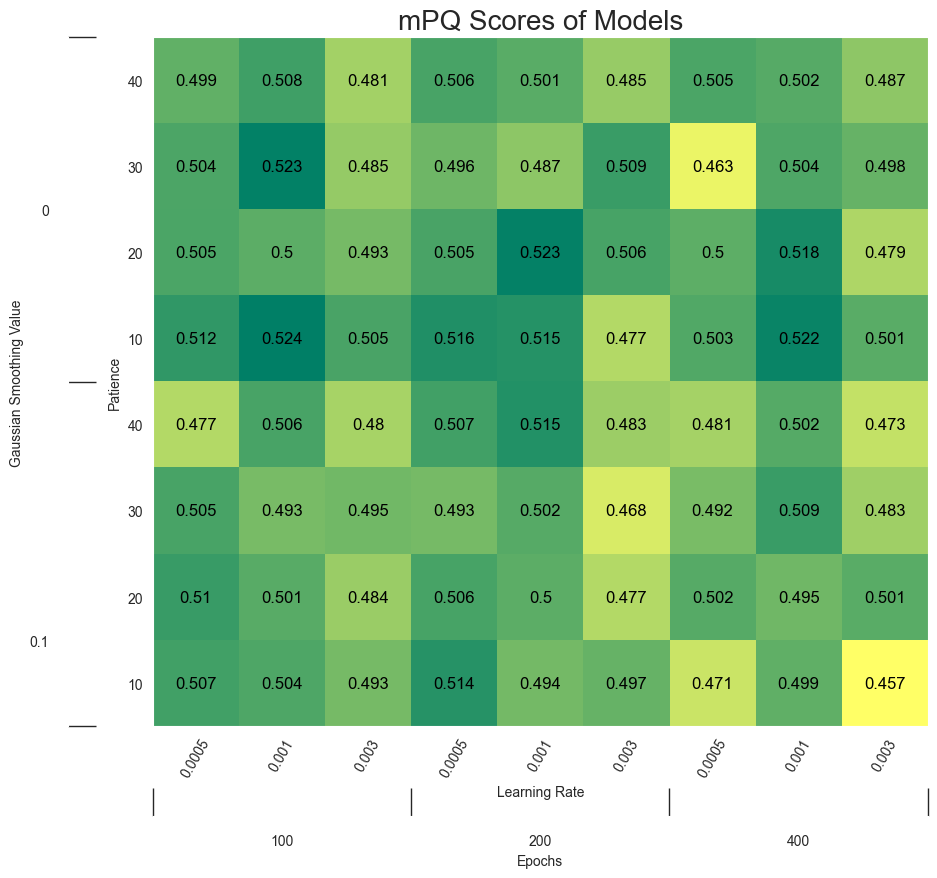

In [176]:
fig, ax = plt.subplots(figsize=(10,10))
#ax.imshow(dat, cmap='coolwarm', interpolation='nearest')
#cmap_rev = plt.cm.get_cmap('summer')
ax.imshow(dat, cmap='summer_r', interpolation='nearest')
ax.grid(False)

x_labs = lr_options[0:3]*3
y_labs = patience_options[::-1]*2

ax.set_xticks(np.arange(len(x_labs)))
ax.set_xticklabels(x_labs,rotation=60)

ax.set_yticks(np.arange(len(y_labs)))
ax.set_yticklabels(y_labs)
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Patience')

lab = ["100", "200", "300"]

#ax2 = ax.secondary_xaxis('bottom')
ax2 = ax.secondary_xaxis(-0.13)
ax2.tick_params('both', length=10, width=0, which='minor')
ax2.tick_params('both', direction='in', which='major', labelsize=10, width=1, length=20)
ax2.set_xticks([-.5, 2.5, 5.5, 8.5])
ax2.xaxis.set_major_formatter(ticker.NullFormatter())

ax2.xaxis.set_minor_locator(ticker.FixedLocator([1, 4, 7]))
ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(['100', '200', '400']))

ax2.set_xlabel('Epochs')

ax3 = ax.secondary_yaxis(-0.11)
ax3.tick_params('both', length=10, width=0, which='minor')
ax3.tick_params('both', direction='in', which='major', labelsize=10, width=1, length=20)
ax3.set_yticks([-.5, 3.5, 7.5])
ax3.yaxis.set_major_formatter(ticker.NullFormatter())

ax3.yaxis.set_minor_locator(ticker.FixedLocator([1.5, 6.5]))
ax3.yaxis.set_minor_formatter(ticker.FixedFormatter(['0', '0.1']))

ax3.set_ylabel('Gaussian Smoothing Value')

# Add annotations
for i in range(len(y_labs)):
    for j in range(len(x_labs)):
        text = ax.text(j, i, round(dat[i, j], 3), ha='center', va='center', color='black',fontsize=12)



plt.title('mPQ Scores of Models',fontsize=20)
#plt.savefig(r'C:\Users\Donald\PycharmProjects\monkey_nuc_segment\Segmentation_Analysis\monkey\thesis\figs\mPQ_heatmap.png', bbox_inches='tight')

plt.show()

In [ ]:
"glue = sns.load_dataset("glue") #.pivot(index="Model", columns="Task", values="Score")
dat = pd.DataFrame(gaus_0_table) #.pivot(index="Model", columns="Task", values="Score")
glue

In [51]:
dat['Patience'] = np.array([40,30,20,10])
dat.pivot(columns='Patience')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

TypeError: '<' not supported between instances of 'ellipsis' and 'ellipsis'

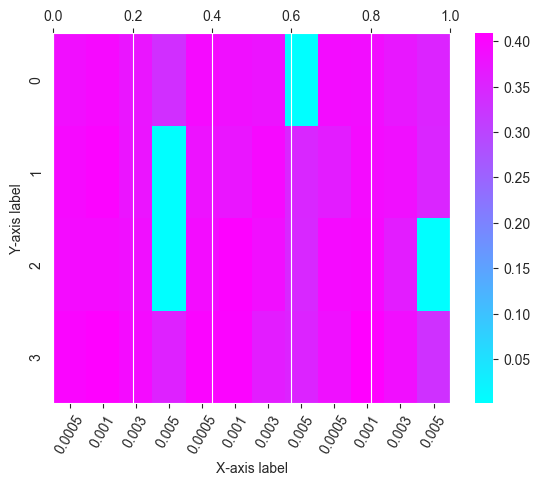

In [52]:
import seaborn as sns

dat = gaus_0_table
heatmap = sns.heatmap(dat,cmap='cool')
heatmap.set_xlabel('X-axis label')
heatmap.set_ylabel('Y-axis label')
heatmap.set_xticklabels(x_labs,rotation=60)

ax2 = plt.twiny()
new_x_labels = [...] # List of new x-axis labels
new_x_ticks = [...] # List of new x-axis tick positions

ax2.set_xticks(new_x_ticks)
ax2.set_xticklabels(new_x_labels, rotation=60)
ax2.set_xlabel('New X-axis label')

plt.show()


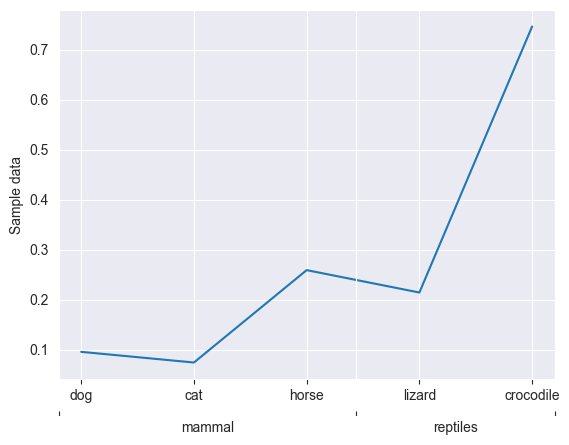

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig1, ax1 = plt.subplots(1)
# Some data
x = np.arange(1,6)
y = np.random.random(len(x))

# First X-axis
ax1.plot(x, y)
ax1.set_xticks(x)
ax1.set_xticklabels(['dog', 'cat', 'horse', 'lizard', 'crocodile'])
ax1.yaxis.set_label_text("Sample data")

# Second X-axis
ax2 = ax1.twiny()

ax2.spines["bottom"].set_position(("axes", -0.10))
ax2.tick_params('both', length=0, width=0, which='minor')
ax2.tick_params('both', direction='in', which='major')
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
 
ax2.set_xticks([0.0, 0.6, 1.0])
ax2.xaxis.set_major_formatter(ticker.NullFormatter())
ax2.xaxis.set_minor_locator(ticker.FixedLocator([0.3, 0.8]))
ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(['mammal', 'reptiles']))

# Third X-axis
# ax3 = ax1.twiny()
# 
# ax3.spines["bottom"].set_position(("axes", -0.20))
# ax3.tick_params('both', length=0, width=0, which='minor')
# ax3.tick_params('both', direction='in', which='major')
# ax3.xaxis.set_ticks_position("bottom")
# ax3.xaxis.set_label_position("bottom")
# 
# ax3.set_xticks([0.0, 1.0])
# ax3.xaxis.set_major_formatter(ticker.NullFormatter())
# ax3.xaxis.set_minor_locator(ticker.FixedLocator([0.5]))
# ax3.xaxis.set_minor_formatter(ticker.FixedFormatter(['vertebrates']))

ax1.grid(True)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.imshow(gaus_0_table, cmap='hot', interpolation='nearest')

x_labs = lr_options*3
y_labs = patience_options[::-1]

ax.set_xticks(np.arange(len(x_labs)))
ax.set_xticklabels(x_labs,rotation=60)

ax.set_yticks(np.arange(len(y_labs)))
ax.set_yticklabels(y_labs)

# Second X-axis
ax2 = ax.twiny()
# ax2.set_xlim(ax.get_xlim())
# ax2.set_xticks(np.arange(len(x_labs)))
# ax2.set_xticks(np.arange(len(x_labs)))

#plt.xlabel('lr')
#plt.ylabel('Patience')
plt.title('Means for Gauss = 0')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9)

plt.show()

In [ ]:
# ax2.spines["bottom"].set_position(("axes", -0.2))
# ax2.tick_params('both', length=0, width=0, which='minor')
# ax2.tick_params('both', direction='in', which='major')
# ax2.xaxis.set_ticks_position("bottom")
# ax2.xaxis.set_label_position("bottom")
# 
# ax2.set_xticks([0.0, 0.33, 0.66,10])
# ax2.xaxis.set_major_formatter(ticker.NullFormatter())
# ax2.xaxis.set_minor_locator(ticker.FixedLocator([0.33/2, 0.66/2, 1/2]))
# ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(['mammal', 'reptiles', 'hi']))


In [ ]:
len(lr_options*3)

In [ ]:
gaus_1_table

In [ ]:
epochs_offset

In [ ]:
patience_options[::-1].index('10')

In [ ]:
print(pt_offset)
print(epochs_offset)
print(gaus_ratio_offset)